In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math

In [2]:
from astropy.table import Table
t = Table.read('../../ijoncour/StandCat/Tgas200_Wright2003_2MASS_FinCat.vot', format='votable')

In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [5]:
#Rename columns
Source = t["Source"]
Gmag = t["__Gmag_"]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
QFlags = t["Qfl"]
DistW = t["Dist"]
s1= t["d_arcsec"]
s2 = t["d_arcsec_2"]
plx = t['Plx']
Teff = t['Teff']
e_Jmag = t['e_Jmag']
e_Kmag = t['e_Kmag']
e_Hmag = t['e_Hmag']
SpType = t["SpType"]
dup = t['Dup']

In [7]:
# mask all data that does not have a Qfl value of A

for i in range(0,len(QFlags)):
    if(QFlags[i][0] == ord("A")):
        Jmag.mask[i] = False
    else:
         Jmag.mask[i] = True
            
for i in range(0,len(QFlags)):
    if(QFlags[i][2] == ord("A")):
        Kmag.mask[i] = False
    else:
        Kmag.mask[i] = True  
        
for i in range(0,len(QFlags)):
    if(QFlags[i][1] == ord("A")):
        Hmag.mask[i] = False
    else:
        Hmag.mask[i] = True  

In [8]:
#mask all values with dup = 1
imask = 0
for i in range(0,len(dup)):
    if (dup[i] > 0.5):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0,len(dup)):
    if(dup[i] > 0.5):
        print(i,dup[i])
print(" Masked ",imask," rows in which dup is equal to 1")

 Masked  25429  rows in which dup is equal to 1


In [9]:
#look at number of duplicate matches
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t["_2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Tdups):
            print(Source[i],s1[i],s2[i],Gmag[i],Vmag[i]-Gmag[i],Jmag[i],Kmag[i],TwoM[i])

GAIA Duplicate Source:  6726788842835559552
GAIA Duplicate Source:  5140648418166947328
GAIA Duplicate Source:  2520020864918288896
GAIA Duplicate Source:  5959478126358758016
GAIA Duplicate Source:  6668487925962916480
GAIA Duplicate Source:  1214512606941823360
GAIA Duplicate Source:  4097002323363211776
GAIA Duplicate Source:  5769091159655753856
GAIA Duplicate Source:  6790250970359184768
GAIA Duplicate Source:  5123327399177495808
GAIA Duplicate Source:  6785793275342096256
GAIA Duplicate Source:  2498832038900176000
GAIA Duplicate Source:  5324415053561705216
GAIA Duplicate Source:  2067478096721765376
GAIA Duplicate Source:  4785096491234658304
GAIA Duplicate Source:  5447076227156166528
GAIA Duplicate Source:  6054493694983536384
GAIA Duplicate Source:  5133580860502607104
GAIA Duplicate Source:  452193638896601088
GAIA Duplicate Source:  1837550183626334848
GAIA Duplicate Source:  3248442439236776960
GAIA Duplicate Source:  4392970203357519360
GAIA Duplicate Source:  567531810

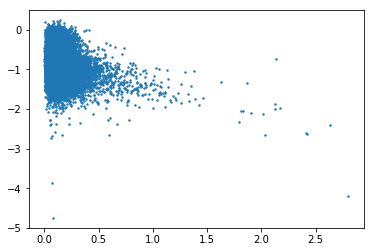

-0.863012770597
0.281449081789


In [12]:
J_G = Jmag-Gmag
plt.scatter(s1,J_G,s=2.0)
plt.show()
JGmean = np.mean(J_G)
JGstd = np.std(J_G)
print(JGmean)
print(JGstd)

 Masked  22  rows based on J-G color > 5 sigma from mean


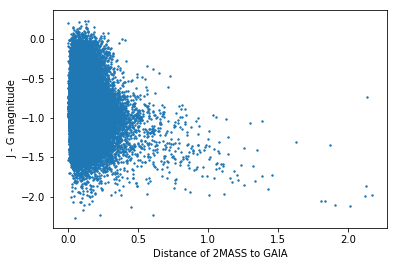

New sigma for J-G:  0.278367044353


In [13]:
#masked rows with J-G greater than 5 sigma from mean
imask = 0
for i in range(0,len(J_G)):
    if(abs(J_G[i] - JGmean) > 5*JGstd):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
print(" Masked ",imask," rows based on J-G color > 5 sigma from mean")
J_G = Jmag - Gmag
plt.xlabel("Distance of 2MASS to GAIA")
plt.ylabel(" J - G magnitude")
plt.scatter(s1,J_G,s=2.0)
plt.show()
print("New sigma for J-G: ",np.std(J_G))

In [39]:
#Translate Spectra Type luminosity class into a number from 1 to 5
#or a negative number if it is a binary or unknown spectral type.
#Note that many stars do not have a luminosity class. There are given 5.1.

SpTypeN = [0.0]*len(SpType)
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)

Finished Luminosity Class Translation
  Number of single Stars:  49718   Binaries or Unknown luminosity class:  428


In [62]:
#Split Class V stars into different temperature ranges
temps = [3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
temp_cat = np.zeros(len(Teff))
for i in range(len(Teff)):
    if (SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
        #temparature category is assigned to each temperature 
        for j in range(len(temps)):
            if (abs(Teff[i] -temps[j]) <= 250):
                temp_cat[i] = temps[j]
print(temp_cat)

[    0.     0.     0. ...,  6500.  6000.     0.]


In [70]:
#find average temperatures, minimum, and maximum for each group 
temp_total = np.zeros(len(temps))
temp_number= np.zeros(len(temps))
temp_min = np.ones(len(temps))
temp_min = temp_min*100000
temp_max = np.zeros(len(temps))
for i in range(len(Teff)): 
    for j in range(len(temps)): 
        if (temp_cat[i] == temps[j]):
                temp_total[j] = temp_total[j] + Teff[i]
                temp_number[j] = temp_number[j] + 1
                if (Teff[i] > temp_max[j]):
                    temp_max[j] = Teff[i]
                if (Teff[i] < temp_min[j]):
                    temp_min[j] = Teff[i]
temp_avg = np.divide(temp_total,temp_number)

print(temp_avg)
print(temp_min)
print(temp_max)

[ 3525.          4025.27777778  4593.26923077  4987.4516129   5468.92425906
  5937.15804807  6440.03303965  6959.8330382   7566.66666667  7931.96319018
  8713.33333333  9110.24340771  9519.88472622            nan]
[   3470.    3850.    4350.    4750.    5250.    5770.    6440.    6870.
    7450.    7850.    8600.    8970.    9480.  100000.]
[ 3580.  4200.  4730.  5150.  5570.  6200.  6470.  7200.  7650.  8200.
  8720.  9230.  9520.     0.]


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
